# Лабораторная работа 1
## Корноушкин Илья 6231 - вариант 2

1) Классификация данных методом k ближайших соседей ( kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 1: задания 1 и 2 на наборе данных CIFAR-10

Вариант 2: задания 1 и 2 на наборе данных MNIST

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

Вариант 4: задания 1 и 3 на наборе данных MNIST

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

from random import shuffle, randrange
from statistics import mode
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

%matplotlib inline
plt.rcParams['figure.figsize'] = (1.0, 1.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.datasets import load_digits 
digits = load_digits()

1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



Примеры изображений:


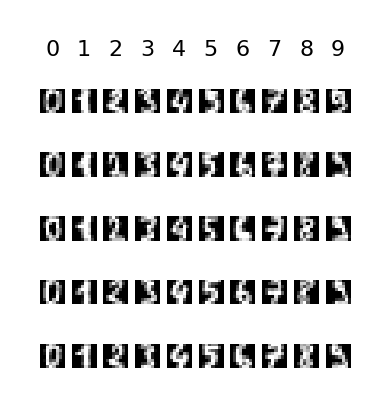

In [3]:
print("Примеры изображений:")
imgs_by_class = []

for i in range(digits.target.max()+1):
    imgs_by_class.append(digits.images[digits.target == i][0:5])

fig, axs = plt.subplots(nrows=5, ncols=10, dpi=400)
fig.subplots_adjust(wspace = 0.3)
for i in range(len(imgs_by_class[0])):
    for j in range(digits.target.max()+1):
        axs[i,j].imshow(imgs_by_class[j][i])
        if (i == 0):
            axs[i,j].set_title(digits.target_names[j], fontsize = 4)
        axs[i,j].axis('off') # отключаем отображение осей
          
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, shuffle=True, random_state=42)

In [5]:
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')

Training data shape: (1437, 64)
Training labels shape: (1437,)
Test data shape: (360, 64)
Test labels shape: (360,)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [6]:
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass

    def train(self, X, y):
        """
        Inputs:
        - X: A numpy array of shape (num_train, D) containing the training data
          consisting of num_train samples each of dimension D.
        - y: A numpy array of shape (N,) containing the training labels, where
             y[i] is the label for X[i].
        """
        self.X_train = X
        self.y_train = y

    def predict(self, X, k=1, num_loops=0):
        """
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data consisting
             of num_test samples each of dimension D.
        - k: The number of nearest neighbors that vote for the predicted labels.
        - num_loops: Determines which implementation to use to compute distances
          between training points and testing points.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        if num_loops == 0:
            self.dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            self.dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            self.dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(self.dists, k=k)

    def compute_distances_two_loops(self, X):
        """
        Inputs:
        - X: A numpy array of shape (num_test, D) containing test data.

        Returns:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          is the Euclidean distance between the ith test point and the jth training
          point.
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            for j in range(num_train):
                #####################################################################
                # TODO:                                                             #
                # Compute the l2 distance between the ith test point and the jth    #
                # training point, and store the result in dists[i, j]. You should   #
                # not use a loop over dimension, nor use np.linalg.norm().          #
                #####################################################################
                # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
                
                dists[i,j] = np.sqrt(np.sum((self.X_train[j] - X[i])**2))

                # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_one_loop(self, X):
        
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
            #######################################################################
            # TODO:                                                               #
            # Compute the l2 distance between the ith test point and all training #
            # points, and store the result in dists[i, :].                        #
            # Do not use np.linalg.norm().                                        #
            #######################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            
            dists[i,:] = np.sqrt(np.sum((X[i] - self.X_train)**2, axis = 1))

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def compute_distances_no_loops(self, X):

        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        #########################################################################
        # TODO:                                                                 #
        # Compute the l2 distance between all test points and all training      #
        # points without using any explicit loops, and store the result in      #
        # dists.                                                                #
        #                                                                       #
        # You should implement this function using only basic array operations; #
        # in particular you should not use functions from scipy,                #
        # nor use np.linalg.norm().                                             #
        #                                                                       #
        # HINT: Try to formulate the l2 distance using matrix multiplication    #
        #       and two broadcast sums.                                         #
        #########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        x2 = np.sum(X**2, axis=1).reshape((num_test, 1))
        x_train2 = np.sum(self.X_train**2, axis = 1).reshape((1, num_train))
        xx_train = X.dot(self.X_train.T)
        dists = np.sqrt(x2 + x_train2 - 2*xx_train)

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return dists

    def predict_labels(self, dists, k=1):
        """
        Inputs:
        - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
          gives the distance betwen the ith test point and the jth training point.

        Returns:
        - y: A numpy array of shape (num_test,) containing predicted labels for the
          test data, where y[i] is the predicted label for the test point X[i].
        """
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
            # A list of length k storing the labels of the k nearest neighbors to
            # the ith test point.
            closest_y = []
            #########################################################################
            # TODO:                                                                 #
            # Use the distance matrix to find the k nearest neighbors of the ith    #
            # testing point, and use self.y_train to find the labels of these       #
            # neighbors. Store these labels in closest_y.                           #
            # Hint: Look up the function numpy.argsort.                             #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            
            closest_y = list(self.y_train[np.argsort(dists[i])[:k]])

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            #########################################################################
            # TODO:                                                                 #
            # Now that you have found the labels of the k nearest neighbors, you    #
            # need to find the most common label in the list closest_y of labels.   #
            # Store this label in y_pred[i]. Break ties by choosing the smaller     #
            # label.                                                                #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            y_pred[i] = mode(closest_y)

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        return y_pred

In [7]:
classifier = KNearestNeighbor()
classifier.train(x_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [8]:
test_preds = classifier.predict(x_test, k = 3, num_loops=0)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


<AxesSubplot: >

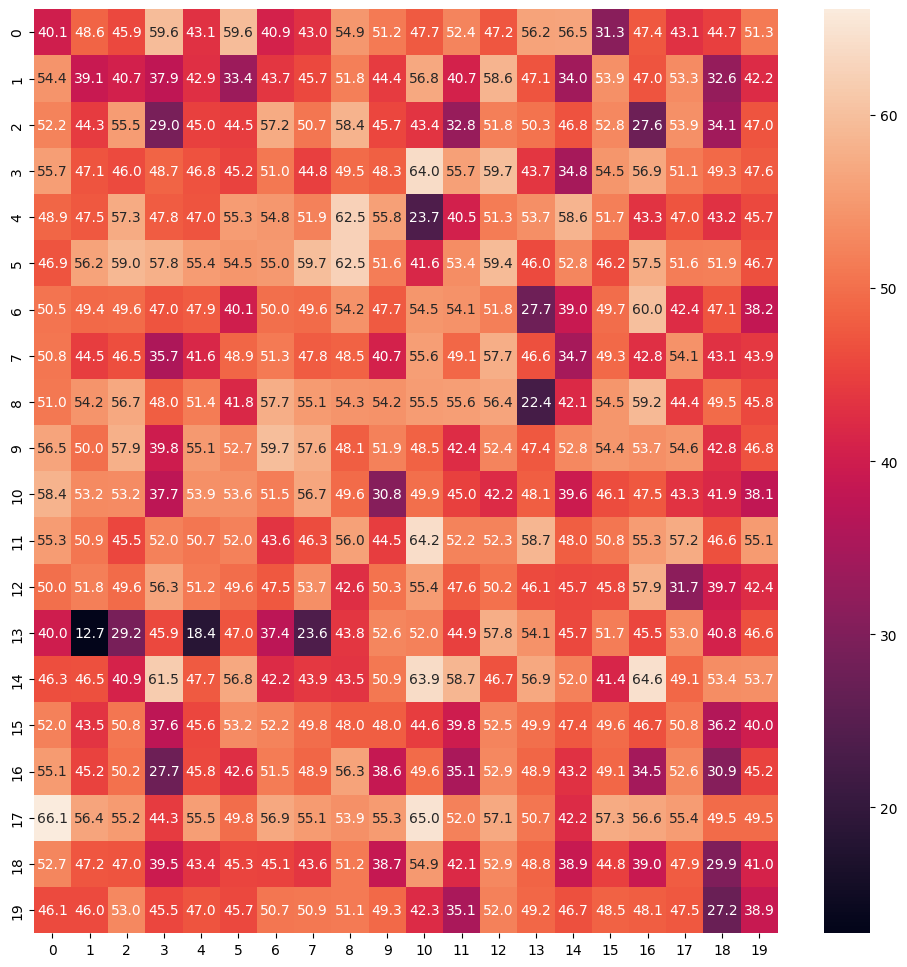

In [9]:
plt.figure(figsize=(12, 12))
sns.heatmap(classifier.dists[:20,:20], annot=True, fmt=".1f")


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [10]:
print(f'Accuracy: {accuracy_score(y_test, test_preds)}')
print(f'Precision: {precision_score(y_test, test_preds, average = "macro")}')
print(f'Recall: {recall_score(y_test, test_preds, average = "macro")}')
print(f'F1: {f1_score(y_test, test_preds, average = "macro")}')

Accuracy: 0.9833333333333333
Precision: 0.9840299054067057
Recall: 0.9840978306216105
F1: 0.9838693018809958


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

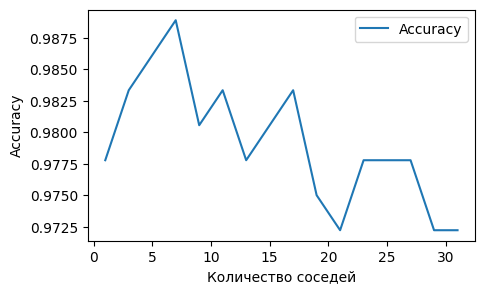

In [11]:
# т.к. для выбора K соседей мы используем уже сохранённые в модели данные, то переучивать модель не нужно
list_accuracy = []
k_range = range (1, 32, 2)
for i in k_range:
    list_accuracy.append(accuracy_score(y_test, classifier.predict(x_test, k=i, num_loops=0)))

# Нарисуем график из полученного листа значений  
plt.figure(figsize=(5, 3))
plt.plot(k_range, list_accuracy, label = 'Accuracy')
plt.xlabel("Количество соседей")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.

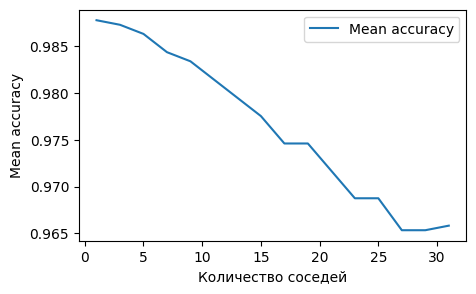

Лучшее K: 1


In [12]:
list_mean_accuracy = list()
k_range = range (1, 32, 2)
for k in k_range:
    scores = list()

    kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=7575) # Объект кросс-валидации

    for i, (train_index, test_index) in enumerate(kf.split(digits.data, digits.target)):
        #print(f'Fold {i}')
        X_train, X_test = digits.data[train_index], digits.data[test_index]
        Y_train, Y_test = digits.target[train_index], digits.target[test_index]

        classifier = KNearestNeighbor()
        classifier.train(X_train, Y_train)

        preds = classifier.predict(X_test, k)
        acc = accuracy_score(Y_test, preds)
        #print(f'Accuracy: {acc}')
        #print()
        scores.append(acc)
      
    list_mean_accuracy.append(np.mean(scores, dtype="float16"))

plt.figure(figsize=(5, 3))
plt.plot(k_range, list_mean_accuracy, label = 'Mean accuracy')
plt.xlabel("Количество соседей")
plt.ylabel("Mean accuracy")
plt.legend()
plt.show()

print(f"Лучшее K: {k_range[np.argmax(list_mean_accuracy)]}")


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [13]:
classifier = KNearestNeighbor()
classifier.train(x_train, y_train)
preds = classifier.predict(x_test, 1)

print(f'Accuracy: {accuracy_score(y_test, preds)}')
print(f'Precision: {precision_score(y_test, preds, average = "macro")}')
print(f'Recall: {recall_score(y_test, preds, average = "macro")}')
print(f'F1: {f1_score(y_test, preds, average = "macro")}')

Accuracy: 0.9777777777777777
Precision: 0.9782686349522614
Recall: 0.9785905842447988
F1: 0.9781224983538881


1.11 Сделайте выводы по результатам 1 части задания.

* В итоге получили, что результат при подобранном k не изменился почти не изменился
* Подбор гиперпараметров лучше делать через кросс валидацию
* Матричные(векторные) методы работают быстрее

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [41]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, test_size=0.3, shuffle=True, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=42)

In [42]:
print(f'Training data shape: {x_train.shape}')
print(f'Training labels shape: {y_train.shape}')
print(f'Validation data shape: {x_val.shape}')
print(f'Validation labels shape: {y_val.shape}')
print(f'Test data shape: {x_test.shape}', )
print(f'Test labels shape: {y_test.shape}')

Training data shape: (1257, 64)
Training labels shape: (1257,)
Validation data shape: (270, 64)
Validation labels shape: (270,)
Test data shape: (270, 64)
Test labels shape: (270,)


2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

(64,)


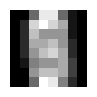

(1257, 64) (270, 64) (270, 64)
(1257, 65) (270, 65) (270, 65)


In [43]:
mean_image = np.mean(x_train, axis=0)

plt.figure(dpi = 100)
print(mean_image.shape)
plt.imshow(mean_image.reshape(8,8).astype('uint8'))
plt.axis("off")
plt.show()

x_train -= mean_image
x_val -= mean_image
x_test -= mean_image

print(x_train.shape, x_val.shape, x_test.shape)

x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_val = np.hstack([x_val, np.ones((x_val.shape[0], 1))])
x_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])

print(x_train.shape, x_val.shape, x_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [44]:

def svm_loss_naive(W, X, y, reg):
    """
    Inputs:
    - W: A numpy array of shape (D, C) containing weights.
    - X: A numpy array of shape (N, D) containing a minibatch of data.
    - y: A numpy array of shape (N,) containing training labels; y[i] = c means
      that X[i] has label c, where 0 <= c < C.
    - reg: (float) regularization strength

    Returns a tuple of:
    - loss as single float
    - gradient with respect to weights W; an array of same shape as W
    """
    
    """
    dW = np.zeros(W.shape) # initialize the gradient as zero

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W)
        correct_class_score = scores[y[i]]
        for j in range(num_classes):
            if j == y[i]:
                continue
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss += margin

    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train

    # Add regularization to the loss.
    loss += reg * np.sum(W * W)
    
    """
    
    #############################################################################
    # TODO:                                                                     #
    # Compute the gradient of the loss function and store it dW.                #
    # Rather than first computing the loss and then computing the derivative,   #
    # it may be simpler to compute the derivative at the same time that the     #
    # loss is being computed. As a result you may need to modify some of the    #
    # code above to compute the gradient.                                       #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    dW = np.zeros(W.shape) # initialize the gradient as zero

    # compute the loss and the gradient
    num_classes = W.shape[1]
    num_train = X.shape[0]
    loss = 0.0
    for i in range(num_train):
        scores = X[i].dot(W) # Вычисляем оценку для классов для 1го изображения
        correct_class_score = scores[y[i]] # Получаем оценку для правдивого класса
        for j in range(num_classes):
            if j == y[i]:
                continue
            # подсчитываем насколько ошиблись
            margin = scores[j] - correct_class_score + 1 # note delta = 1
            if margin > 0:
                loss += margin # суммируем ошибки
                dW[:, j] += X[i] # т.к. это изображение добавило ошибку, то добавляем его в j класс
                dW[:, y[i]] -= X[i] # компенсируем то, что можем сделать это num_classes раз

    # Right now the loss is a sum over all training examples, but we want it
    # to be an average instead so we divide by num_train.
    loss /= num_train
    dW /= num_train

    # Add regularization to the loss.
    loss += reg * np.sum(W * W)
    dW += reg * W

    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    return loss, dW

def svm_loss_vectorized(W, X, y, reg):

    loss = 0.0
    dW = np.zeros(W.shape) # initialize the gradient as zero

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the structured SVM loss, storing the    #
    # result in loss.                                                           #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    scores = X.dot(W)
    
    # Делаем то же, что и в svm_loss_naive, только матрично
    correct_label_score_idxes = (range(scores.shape[0]), y)
    correct_label_scores = scores[correct_label_score_idxes]
    scores_diff = scores - np.reshape(correct_label_scores, (-1, 1)) + 1
    scores_diff[correct_label_score_idxes] = 0
    
    scores_diff[np.nonzero(scores_diff < 0)] = 0
    
    loss = scores_diff.sum()
    num_train = X.shape[0]
    loss /= num_train
    loss += 0.5 * reg * np.sum(W * W)
  
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    #############################################################################
    # TODO:                                                                     #
    # Implement a vectorized version of the gradient for the structured SVM     #
    # loss, storing the result in dW.                                           #
    #                                                                           #
    # Hint: Instead of computing the gradient from scratch, it may be easier    #
    # to reuse some of the intermediate values that you used to compute the     #
    # loss.                                                                     #
    #############################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    
    scores_diff[scores_diff > 0] = 1
    correct_label_vals = -1 * scores_diff.sum(axis=1)
    scores_diff[correct_label_score_idxes] = correct_label_vals

    dW = X.T.dot(scores_diff)
    dW /= num_train
    dW += reg * W
    
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

    return loss, dW

In [45]:
import time

W = np.random.randn(65, 10) * 0.0001 

loss, grad = svm_loss_naive(W, x_train, y_train, 0.000005)
print('loss: %f' % (loss, ))

loss: 8.996081



2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [46]:
def grad_check_sparse(f, x, analytic_grad, num_checks=10, h=1e-5):
    for i in range(num_checks):
        ix = tuple([randrange(m) for m in x.shape])

        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evaluate f(x + h)
        x[ix] = oldval - h # increment by h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # reset

        grad_numerical = (fxph - fxmh) / (2 * h)
        grad_analytic = analytic_grad[ix]
        rel_error = (abs(grad_numerical - grad_analytic) /
                    (abs(grad_numerical) + abs(grad_analytic)))
        print('numerical: %f analytic: %f, relative error: %e'
              %(grad_numerical, grad_analytic, rel_error))

In [47]:
loss, grad = svm_loss_naive(W, x_train, y_train, 0.0)

f = lambda w: svm_loss_naive(w, x_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

print()

loss, grad = svm_loss_naive(W, x_train, y_train, 5e1)
f = lambda w: svm_loss_naive(w, x_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: 0.436986 analytic: 0.436986, relative error: 7.818144e-10
numerical: -0.018298 analytic: -0.018298, relative error: 3.609325e-08
numerical: 0.002373 analytic: 0.002373, relative error: 2.580046e-07
numerical: 0.285966 analytic: 0.285966, relative error: 1.166117e-09
numerical: -3.748738 analytic: -3.748738, relative error: 5.707300e-11
numerical: -0.020734 analytic: -0.020734, relative error: 1.583149e-08
numerical: -0.459840 analytic: -0.459840, relative error: 7.918515e-11
numerical: 0.140818 analytic: 0.140818, relative error: 4.032333e-09
numerical: 0.012341 analytic: 0.012341, relative error: 5.433677e-08
numerical: -2.106738 analytic: -2.106738, relative error: 1.695862e-10

numerical: 0.000457 analytic: -0.004869, relative error: 1.000000e+00
numerical: -4.456395 analytic: -4.445224, relative error: 1.254968e-03
numerical: 4.479510 analytic: 4.482214, relative error: 3.017293e-04
numerical: 0.333178 analytic: 0.330230, relative error: 4.444725e-03
numerical: 0.017281 

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [48]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, x_train, y_train, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, x_train, y_train, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.067761s
Vectorized loss and gradient: computed in 0.003523s
difference: 0.000000


2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [49]:
class LinearClassifier(object):

    def __init__(self):
        self.W = None

    def train(self, X, y, learning_rate=1e-3, reg=1e-5, num_iters=100,
              batch_size=200, verbose=False):
        """
        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.
        - y: A numpy array of shape (N,) containing training labels; y[i] = c
          means that X[i] has label 0 <= c < C for C classes.
        - learning_rate: (float) learning rate for optimization.
        - reg: (float) regularization strength.
        - num_iters: (integer) number of steps to take when optimizing
        - batch_size: (integer) number of training examples to use at each step.
        - verbose: (boolean) If true, print progress during optimization.

        Outputs:
        A list containing the value of the loss function at each training iteration.
        """
        num_train, dim = X.shape
        num_classes = np.max(y) + 1 # assume y takes values 0...K-1 where K is number of classes
        if self.W is None:
            # lazily initialize W
            self.W = 0.001 * np.random.randn(dim, num_classes)

        # Run stochastic gradient descent to optimize W
        loss_history = []
        for it in range(num_iters):
            X_batch = None
            y_batch = None

            #########################################################################
            # TODO:                                                                 #
            # Sample batch_size elements from the training data and their           #
            # corresponding labels to use in this round of gradient descent.        #
            # Store the data in X_batch and their corresponding labels in           #
            # y_batch; after sampling X_batch should have shape (batch_size, dim)   #
            # and y_batch should have shape (batch_size,)                           #
            #                                                                       #
            # Hint: Use np.random.choice to generate indices. Sampling with         #
            # replacement is faster than sampling without replacement.              #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            batch_idxes = np.random.choice(num_train, batch_size, replace=True)
            X_batch = X[batch_idxes, :]
            y_batch = y[batch_idxes]

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            # evaluate loss and gradient
            loss, grad = self.loss(X_batch, y_batch, reg)
            loss_history.append(loss)

            # perform parameter update
            #########################################################################
            # TODO:                                                                 #
            # Update the weights using the gradient and the learning rate.          #
            #########################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            self.W -= learning_rate * grad

            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

            if verbose and it % 100 == 0:
                print('iteration %d / %d: loss %f' % (it, num_iters, loss))

        return loss_history

    def predict(self, X):
        """
        Inputs:
        - X: A numpy array of shape (N, D) containing training data; there are N
          training samples each of dimension D.

        Returns:
        - y_pred: Predicted labels for the data in X. y_pred is a 1-dimensional
          array of length N, and each element is an integer giving the predicted
          class.
        """
        y_pred = np.zeros(X.shape[0])
        ###########################################################################
        # TODO:                                                                   #
        # Implement this method. Store the predicted labels in y_pred.            #
        ###########################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

        class_preds = X.dot(self.W)
        y_pred = class_preds.argmax(axis=1)
        return y_pred

        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return y_pred

    def loss(self, X_batch, y_batch, reg):
        pass

class LinearSVM(LinearClassifier):
    """ A subclass that uses the Multiclass SVM loss function """

    def loss(self, X_batch, y_batch, reg):
        return svm_loss_vectorized(self.W, X_batch, y_batch, reg)

In [50]:
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(x_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 17.006902
iteration 100 / 1500: loss 13.789222
iteration 200 / 1500: loss 11.854089
iteration 300 / 1500: loss 10.692633
iteration 400 / 1500: loss 9.981780
iteration 500 / 1500: loss 9.551348
iteration 600 / 1500: loss 9.285202
iteration 700 / 1500: loss 9.137901
iteration 800 / 1500: loss 9.056087
iteration 900 / 1500: loss 8.990909
iteration 1000 / 1500: loss 8.957233
iteration 1100 / 1500: loss 8.931775
iteration 1200 / 1500: loss 8.919441
iteration 1300 / 1500: loss 8.906911
iteration 1400 / 1500: loss 8.914043
That took 0.567785s


In [51]:
y_train_pred = svm.predict(x_train)
print(f'Training accuracy: {np.mean(y_train == y_train_pred)}')
y_val_pred = svm.predict(x_val)
print(f'Validation accuracy: {np.mean(y_val == y_val_pred)}')
y_test_pred = svm.predict(x_test)
print(f'Test accuracy: %f' % (np.mean(y_test == y_test_pred), ))

Training accuracy: 0.8599840891010342
Validation accuracy: 0.8666666666666667
Test accuracy: 0.851852


2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [52]:
learning_rates = [1e-7, 5e-7, 1e-6, 5e-6, 1e-5, 5e-5]
regularization_strengths = [1e3, 5e3, 1e4, 2e4, 3e4]
best_accuracy = 0
best_lr = 0
best_reg = 0

np.random.seed(42)

for lr in learning_rates:
    for rs in regularization_strengths:
        svm = LinearSVM()
        svm.train(x_train, y_train, learning_rate=lr, reg=rs,
                      num_iters=1500, verbose=False)
        y_val_pred = svm.predict(x_val)
        
        if ((np.mean(y_val == y_val_pred)) > best_accuracy):
            best_lr = lr
            best_reg = rs
            best_accuracy = (np.mean(y_val == y_val_pred))
        print(f'Lr: {lr}, reg: {rs}, accuracy: {(np.mean(y_val == y_val_pred))}')
        
print(f'Best result: Accuracy: {best_accuracy}. Lr: {best_lr} , reg: {best_reg}')

Lr: 1e-07, reg: 1000.0, accuracy: 0.7
Lr: 1e-07, reg: 5000.0, accuracy: 0.725925925925926
Lr: 1e-07, reg: 10000.0, accuracy: 0.7925925925925926
Lr: 1e-07, reg: 20000.0, accuracy: 0.8814814814814815
Lr: 1e-07, reg: 30000.0, accuracy: 0.8703703703703703
Lr: 5e-07, reg: 1000.0, accuracy: 0.8666666666666667
Lr: 5e-07, reg: 5000.0, accuracy: 0.8740740740740741
Lr: 5e-07, reg: 10000.0, accuracy: 0.8740740740740741
Lr: 5e-07, reg: 20000.0, accuracy: 0.8777777777777778
Lr: 5e-07, reg: 30000.0, accuracy: 0.8740740740740741
Lr: 1e-06, reg: 1000.0, accuracy: 0.8740740740740741
Lr: 1e-06, reg: 5000.0, accuracy: 0.8814814814814815
Lr: 1e-06, reg: 10000.0, accuracy: 0.8814814814814815
Lr: 1e-06, reg: 20000.0, accuracy: 0.8814814814814815
Lr: 1e-06, reg: 30000.0, accuracy: 0.8814814814814815
Lr: 5e-06, reg: 1000.0, accuracy: 0.8888888888888888
Lr: 5e-06, reg: 5000.0, accuracy: 0.8666666666666667
Lr: 5e-06, reg: 10000.0, accuracy: 0.8703703703703703
Lr: 5e-06, reg: 20000.0, accuracy: 0.877777777777777

In [53]:
svm = LinearSVM()
svm.train(x_train, y_train, learning_rate=best_lr, reg=best_reg,
              num_iters=1500, verbose=False)
y_test_pred = svm.predict(x_test)
        
y_test_pred = svm.predict(x_test)
print(f'Test accuracy: %f' % (np.mean(y_test == y_test_pred), ))

Test accuracy: 0.840741


2.9 Сделайте выводы по второй части задания

* Результаты хуже чем у kNN
* Подбор гиперпараметров не помог, и даже ухудшил результат на тестовых данных
* Нужен больший датасет для более лучшего анализа

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [ ]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [ ]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания